In [1]:
import pandas as pd
import numpy as np

In [2]:
# determine voting population by state
v_pop_2016_df = pd.read_csv('data/general-election-2016.csv')
v_pop_2016_df.head()

,State,VEP Total Ballots Counted,VEP Highest Office,VAP Highest Office,Total Ballots Counted,Highest Office,Voting-Eligible Population (VEP),Voting-Age Population (VAP),% Non-citizen,Prison,Probation,Parole,Total Ineligible Felon,Overseas Eligible,State Abv
0,United States,NaN,NaN,NaN,NaN,NaN,2.315566e+08,251107404.0,0.08,1493706.0,2298993.0,461472.0,3242614.08,4739595.99,US
1,Alabama,NaN,NaN,NaN,NaN,NaN,3.606103e+06,3773719.0,0.03,31691.0,53640.0,8097.0,69826.40,NaN,AL
2,Alaska,NaN,NaN,NaN,NaN,NaN,5.195009e+05,554802.0,0.04,5216.0,7077.0,2210.0,11389.12,NaN,AK
3,Arizona,NaN,NaN,NaN,NaN,NaN,4.738332e+06,5332446.0,0.10,37516.0,73232.0,7502.0,86027.92,NaN,AZ
4,Arkansas,NaN,NaN,NaN,NaN,NaN,2.148441e+06,2290976.0,0.04,17756.0,28192.0,21743.0,55286.52,NaN,AR


In [3]:
# Have to estimate the voting population per state using 2012 data (this is probably terrible--sorry, Chris A!)
v_pop_2012_df = pd.read_csv('data/general-election-2012.csv')
v_pop_2016_df['vep_ho'] = v_pop_2016_df['Voting-Eligible Population (VEP)'] * v_pop_2012_df['VEP Highest Office']
v_pop_2016_df[['State', 'vep_ho']].head()

,State,vep_ho
0,United States,1.343028e+08
1,Alabama,2.113176e+06
2,Alaska,3.049470e+05
3,Arizona,2.492363e+06
4,Arkansas,1.089259e+06


In [4]:
# Merge on electoral votes
state_df = pd.read_csv('data/electoral-votes.csv', index_col='State')
state_df.head()

,Electoral Votes
State,
Alabama,9
Alaska,3
Arizona,11
Arkansas,6
California,55


In [5]:
pop_df = state_df.merge(v_pop_2016_df[['State', 'State Abv', 'vep_ho']], how='outer', left_index=True, right_on='State')
pop_df.set_index('State', inplace=True)
pop_df.head()

,Electoral Votes,State Abv,vep_ho
State,,,
Alabama,9.0,AL,2.113176e+06
Alaska,3.0,AK,3.049470e+05
Arizona,11.0,AZ,2.492363e+06
Arkansas,6.0,AR,1.089259e+06
California,55.0,CA,1.392862e+07


In [6]:
# I can sum the electoral votes for the country and I should get something familiar.
pop_df.loc[pop_df['State Abv'] == 'US', 'Electoral Votes'] = pop_df.loc[pop_df['State Abv'] != 'US', 'Electoral Votes'].sum()
pop_df.loc[pop_df['State Abv'] == 'US']

,Electoral Votes,State Abv,vep_ho
State,,,
United States,538.0,US,1.343028e+08


In [7]:
# Now look at people's responses
picks_df = pd.read_csv('data/picks.csv', na_values=['TBD'], index_col='State')
picks_df.head()

,Aaron,Austin,Bill,Bret,Julia,Dale,David,Dawn,Diane,Erica,...,Liz,Luke,Matt,Max,Neil,Phil C,Phil K,Ron,Sara,Sasha
State,,,,,,,,,,,,,,,,,,,,,
Alabama,Trump 20+,NaN,Trump 20+,Trump 10+,Trump 10+,Trump 20+,NaN,Trump 10+,Trump 20+,Trump 20+,...,Trump 20+,Trump 20+,Trump 20+,Trump 20+,Trump 20+,Trump 20+,Trump 20+,Trump 20+,Trump 20+,Trump 20+
Alaska,Trump 10+,NaN,Trump 10+,Trump 0+,Trump 5+,Trump 10+,NaN,Trump 0+,Trump 10+,Trump 5+,...,Trump 0+,Trump 5+,Trump 5+,Trump 5+,Trump 5+,Trump 5+,Trump 5+,Trump 10+,Trump 5+,Trump 5+
Arizona,Trump 0+,NaN,Trump 0+,Trump 5+,Clinton 0+,Trump 0+,NaN,Clinton 0+,Trump 10+,Trump 0+,...,Trump 0+,Trump 0+,Trump 0+,Trump 0+,Trump 0+,Trump 0+,Trump 0+,Trump 5+,Trump 0+,Trump 0+
Arkansas,Trump 10+,NaN,Trump 10+,Trump 5+,Trump 10+,Trump 20+,NaN,Trump 10+,Trump 20+,Trump 10+,...,Trump 20+,Trump 20+,Trump 20+,Trump 20+,Trump 20+,Trump 20+,Trump 20+,Trump 20+,Trump 10+,Trump 10+
California,Clinton 20+,NaN,Clinton 10+,Clinton 20+,Clinton 20+,Clinton 20+,NaN,Clinton 20+,Clinton 20+,Clinton 20+,...,Clinton 20+,Clinton 20+,Clinton 20+,Clinton 20+,Clinton 20+,Clinton 20+,Clinton 20+,Clinton 20+,Clinton 10+,Clinton 20+


In [8]:
# Drop people who have NaN or TBD selections anywhere because I don't know what to do with them.
picks_df.dropna(axis='columns', how='any', inplace=True)
picks_df.head()

,Aaron,Bill,Bret,Julia,Dale,Dawn,Diane,Erica,Glenn,Jessica,...,Liz,Luke,Matt,Max,Neil,Phil C,Phil K,Ron,Sara,Sasha
State,,,,,,,,,,,,,,,,,,,,,
Alabama,Trump 20+,Trump 20+,Trump 10+,Trump 10+,Trump 20+,Trump 10+,Trump 20+,Trump 20+,Clinton 0+,Trump 10+,...,Trump 20+,Trump 20+,Trump 20+,Trump 20+,Trump 20+,Trump 20+,Trump 20+,Trump 20+,Trump 20+,Trump 20+
Alaska,Trump 10+,Trump 10+,Trump 0+,Trump 5+,Trump 10+,Trump 0+,Trump 10+,Trump 5+,Trump 5+,Trump 5+,...,Trump 0+,Trump 5+,Trump 5+,Trump 5+,Trump 5+,Trump 5+,Trump 5+,Trump 10+,Trump 5+,Trump 5+
Arizona,Trump 0+,Trump 0+,Trump 5+,Clinton 0+,Trump 0+,Clinton 0+,Trump 10+,Trump 0+,Trump 5+,Trump 0+,...,Trump 0+,Trump 0+,Trump 0+,Trump 0+,Trump 0+,Trump 0+,Trump 0+,Trump 5+,Trump 0+,Trump 0+
Arkansas,Trump 10+,Trump 10+,Trump 5+,Trump 10+,Trump 20+,Trump 10+,Trump 20+,Trump 10+,Clinton 5+,Trump 5+,...,Trump 20+,Trump 20+,Trump 20+,Trump 20+,Trump 20+,Trump 20+,Trump 20+,Trump 20+,Trump 10+,Trump 10+
California,Clinton 20+,Clinton 10+,Clinton 20+,Clinton 20+,Clinton 20+,Clinton 20+,Clinton 20+,Clinton 20+,Clinton 20+,Clinton 20+,...,Clinton 20+,Clinton 20+,Clinton 20+,Clinton 20+,Clinton 20+,Clinton 20+,Clinton 20+,Clinton 20+,Clinton 10+,Clinton 20+


In [9]:
# Convert to some sort of margin
margin_map = {
    'Trump 20+': -.225,
    'Trump 10+': -.15,
    'Trump 5+': -.075,
    'Trump 0+': -.025,
    'Clinton 0+': .025,
    'Clinton 5+': .075,
    'Clinton 10+': .15,
    'Clinton 20+': .225,
}
picks_pct_df = picks_df.applymap(lambda x: margin_map[x])
picks_pct_df.head()

,Aaron,Bill,Bret,Julia,Dale,Dawn,Diane,Erica,Glenn,Jessica,...,Liz,Luke,Matt,Max,Neil,Phil C,Phil K,Ron,Sara,Sasha
State,,,,,,,,,,,,,,,,,,,,,
Alabama,-0.225,-0.225,-0.150,-0.150,-0.225,-0.150,-0.225,-0.225,0.025,-0.150,...,-0.225,-0.225,-0.225,-0.225,-0.225,-0.225,-0.225,-0.225,-0.225,-0.225
Alaska,-0.150,-0.150,-0.025,-0.075,-0.150,-0.025,-0.150,-0.075,-0.075,-0.075,...,-0.025,-0.075,-0.075,-0.075,-0.075,-0.075,-0.075,-0.150,-0.075,-0.075
Arizona,-0.025,-0.025,-0.075,0.025,-0.025,0.025,-0.150,-0.025,-0.075,-0.025,...,-0.025,-0.025,-0.025,-0.025,-0.025,-0.025,-0.025,-0.075,-0.025,-0.025
Arkansas,-0.150,-0.150,-0.075,-0.150,-0.225,-0.150,-0.225,-0.150,0.075,-0.075,...,-0.225,-0.225,-0.225,-0.225,-0.225,-0.225,-0.225,-0.225,-0.150,-0.150
California,0.225,0.150,0.225,0.225,0.225,0.225,0.225,0.225,0.225,0.225,...,0.225,0.225,0.225,0.225,0.225,0.225,0.225,0.225,0.150,0.225


In [10]:
# How many electoral votes per person?
picks_dem_df = picks_pct_df > 0
ev_df = picks_dem_df.mul(pop_df.loc[pop_df.index != 'United States', 'Electoral Votes'], axis='index')
ev_df -= (~picks_dem_df).mul(pop_df.loc[pop_df.index != 'United States', 'Electoral Votes'], axis='index')

In [11]:
# How many popular votes per person? (this is probably wrong--sorry, Chris A!)
pv_df = picks_pct_df.mul(pop_df.loc[pop_df.index != 'United States', 'vep_ho'], axis='index')

In [12]:
# Electoral vote differential
ev_sum = ev_df.sum(axis='index').sort_values()
ev_sum

Dale      -104.0
Phil K       6.0
Liz         18.0
Phil C      50.0
Bret        56.0
Aaron       76.0
Sasha       78.0
Dawn        78.0
Bill        90.0
Erica      108.0
Matt       108.0
Max        108.0
Neil       108.0
Ron        108.0
Luke       110.0
John       120.0
Diane      124.0
Sara       126.0
Kim        126.0
Julia      142.0
Jessica    156.0
Glenn      226.0
dtype: float64

In [13]:
# Popular vote differential
pv_sum = pv_df.sum(axis='index').sort_values()
pv_sum

Dale      -2.989665e+05
Bill       2.427051e+06
Phil C     3.127778e+06
Diane      3.175207e+06
Phil K     3.267688e+06
Sara       3.428570e+06
Ron        3.436375e+06
Sasha      4.099412e+06
Erica      4.100519e+06
Matt       4.146827e+06
Liz        4.196695e+06
Luke       4.454147e+06
Neil       4.758005e+06
Jessica    5.673229e+06
Dawn       5.800090e+06
Max        6.011226e+06
John       6.208564e+06
Bret       6.412500e+06
Aaron      6.639357e+06
Julia      7.028478e+06
Kim        7.407334e+06
Glenn      9.325570e+06
dtype: float64

In [14]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

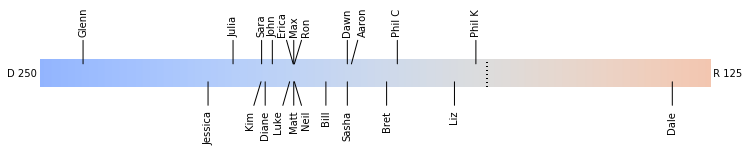

In [15]:
gradient = np.linspace(0, 1, 538*2)
gradient = np.vstack((gradient, gradient))

offsets = {
    'Aaron': 12,
    'Erica': -12,
    'Neil': 12,
    'Luke': -12,
    'Ron': 12,
    'Kim': -12
}

plt.figure(figsize=(12,.5))
plt.set_cmap(matplotlib.colors.Colormap('coolwarm', 538*2))
plt.imshow(gradient, aspect='auto', extent=(-538,538,-1,1))

for idx, (name, ev) in enumerate(zip(ev_sum.index, ev_sum)):
    ud = idx%2 - .5
    tb = 'top'
    if idx%2:
        tb = 'bottom'
    offset = offsets.get(name, 0)
    plt.annotate(name, xy=(-ev, ud), xycoords='data', xytext=(offset, 2*ud*30), textcoords='offset points',
                 ha='center', va=tb, rotation='vertical',
                arrowprops=dict(arrowstyle='-'))

plt.xlim((-250,125))
plt.ylim((-1,1))

plt.vlines(0, -1, 1, linestyle='dotted', lw=2)
plt.text(-250, 0, 'D 250 ', va='center', ha='right')
plt.text(125, 0, ' R 125', va='center', ha='left')
plt.axis('off')

plt.savefig('picker-winners.png')

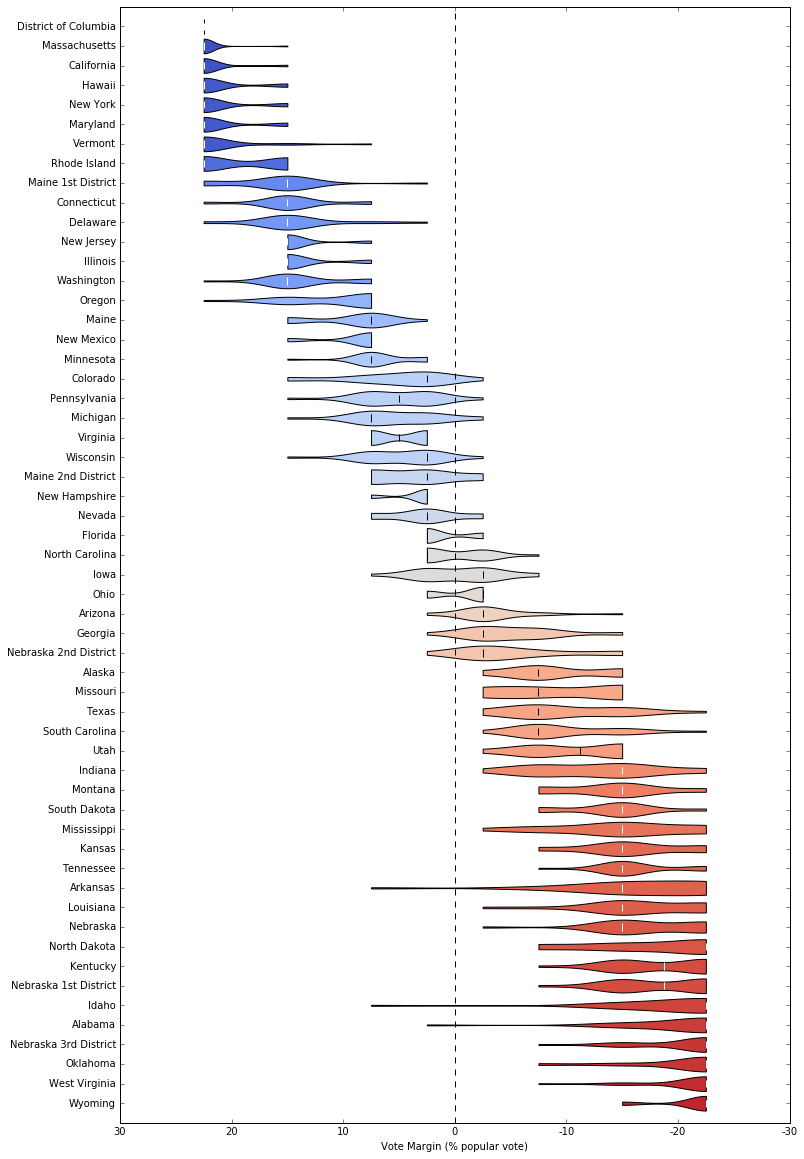

In [16]:
# Where do we disagree?
# Sort by mean pick
picks_pct_df['mean'] = picks_pct_df.mean(axis='columns')
sorted_pct_df = picks_pct_df.sort_values('mean')
sorted_pct_df.drop('mean', axis='columns', inplace=True)

plt.figure(figsize=(12,20))

violins = plt.violinplot(
    sorted_pct_df.as_matrix().transpose(),
    vert=False,
    widths=.75,
    showmedians=True,
    showextrema=False,
)

# Color bodies by median
cmap = plt.get_cmap('coolwarm', 538)
state_colors = (-sorted_pct_df.mean(axis='columns') + .225)/.45
for body,c in zip(violins['bodies'], state_colors):
    body.set_facecolor(cmap(c))
    body.set_alpha(1)
violins['cmedians'].set_color(['white' if c < .25 or c > .75
                              else 'black'
                              for c in state_colors])

ylabels = sorted_pct_df.index
plt.yticks(range(1,len(ylabels) + 1), ylabels)

plt.gca().invert_xaxis()
plt.gca().get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(float(x) * 100, '0.0f')))
plt.vlines(0, 0, len(ylabels) + 1, linestyle='dashed')
plt.xlabel('Vote Margin (% popular vote)')

plt.savefig('picker-margins.png')

In [17]:
# Some summaries
picks_pct_df.mean(axis='columns').sort_values() * 100

State
Wyoming                 -2.113636e+01
West Virginia           -2.079545e+01
Oklahoma                -2.011364e+01
Nebraska 3rd District   -2.011364e+01
Alabama                 -1.965909e+01
Idaho                   -1.909091e+01
Nebraska 1st District   -1.840909e+01
Kentucky                -1.840909e+01
North Dakota            -1.772727e+01
Nebraska                -1.750000e+01
Louisiana               -1.681818e+01
Arkansas                -1.670455e+01
Tennessee               -1.636364e+01
Kansas                  -1.602273e+01
Mississippi             -1.511364e+01
South Dakota            -1.397727e+01
Montana                 -1.397727e+01
Indiana                 -1.272727e+01
Utah                    -1.079545e+01
South Carolina          -1.000000e+01
Texas                   -9.886364e+00
Missouri                -9.545455e+00
Alaska                  -9.204545e+00
Nebraska 2nd District   -5.454545e+00
Georgia                 -5.227273e+00
Arizona                 -3.295455e+00
Ohio  

In [18]:
picks_pct_df.std(axis='columns').sort_values() * 100

State
District of Columbia     8.326673e-15
Massachusetts            1.562242e+00
New Hampshire            1.928473e+00
California               2.156098e+00
Florida                  2.226809e+00
Ohio                     2.328852e+00
Virginia                 2.500000e+00
New Jersey               2.573807e+00
Minnesota                2.757878e+00
Illinois                 2.892710e+00
New Mexico               2.892710e+00
Hawaii                   2.892710e+00
New York                 2.892710e+00
Maryland                 2.892710e+00
Wyoming                  2.892710e+00
North Carolina           2.919371e+00
Nevada                   3.189925e+00
Arizona                  3.485878e+00
Connecticut              3.559195e+00
Pennsylvania             3.573678e+00
Wisconsin                3.573678e+00
Iowa                     3.586303e+00
Maine                    3.629254e+00
Washington               3.671703e+00
Maine 2nd District       3.671703e+00
Tennessee                3.671703e+00
Vermon

In [19]:
# How about who will win?  Ignore pct.
picks_win_df = picks_pct_df.applymap(np.sign)
picks_win = picks_win_df.mean(axis='columns').sort_values(ascending=False)
picks_win

State
New Mexico               1.000000
Rhode Island             1.000000
Hawaii                   1.000000
Minnesota                1.000000
New Hampshire            1.000000
New Jersey               1.000000
Massachusetts            1.000000
New York                 1.000000
District of Columbia     1.000000
Maryland                 1.000000
Oregon                   1.000000
Delaware                 1.000000
Connecticut              1.000000
California               1.000000
Maine 1st District       1.000000
Vermont                  1.000000
Virginia                 1.000000
Washington               1.000000
Maine                    1.000000
Illinois                 1.000000
Pennsylvania             0.913043
Wisconsin                0.913043
Colorado                 0.913043
Michigan                 0.826087
Maine 2nd District       0.652174
Nevada                   0.652174
Florida                  0.478261
North Carolina           0.130435
Iowa                    -0.130435
Ohio    

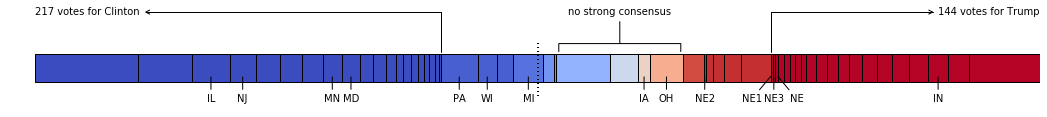

In [20]:
# Let's see if I can plot this like 538's road to victory...
picks_win_mean_df = pd.DataFrame(picks_win, columns=['mean'])
picks_win_mean_df = picks_win_mean_df.merge(state_df, how='left', right_index=True, left_index=True)
picks_win_mean_df['signed_ev'] = picks_win_mean_df['Electoral Votes'] * picks_win_mean_df['mean'].apply(np.sign)
picks_win_mean_df.sort_values(['mean', 'signed_ev'], ascending=[False, False], inplace=True)
path_x = picks_win_mean_df['Electoral Votes'].cumsum().as_matrix()
path_x = np.roll(path_x, 1)
path_x[0] = 0
path_w = picks_win_mean_df['Electoral Votes'].as_matrix()
path_c = (-picks_win_mean_df['mean'].as_matrix() + 1)/2

plt.figure(figsize=(18,1))
cmap = plt.get_cmap('coolwarm', 538)

patches = [matplotlib.patches.Rectangle((x, -.5), w, 1, facecolor=cmap(c))
           for x, w, c in zip(path_x, path_w, path_c)]
ax = plt.gca()
for patch in patches:
    ax.add_patch(patch)
# Annotate some notable states
b1g = {
    'IL': (94,0),
    'NJ': (111,0),
    'MN': (159,0),
    'MD': (169,0),
    'PA': (227,0),
    'WI': (242,0),
    'MI': (264,0),
    'IA': (326,0),
    'OH': (338,0),
    'NE2': (358.5,0),
    'NE1': (394.5,-20),
    'NE3': (395.5,0),
    'NE': (397,20),
    'IN': (483.5,0),
}
for name, values in b1g.items():
    x = values[0]
    o = values[1]
    plt.annotate(name, xy=(x, -.25), xycoords='data', xytext=(o, -24), textcoords='offset points',
                 ha='center', va='center',
                 arrowprops=dict(arrowstyle='-'))

# Definitely one way or the other
plt.annotate('217 votes for Clinton', xy=(217, .5), xycoords='data', xytext=(0, 2), textcoords='data',
            ha='left', va='center',
            arrowprops=dict(connectionstyle='angle,angleA=0,angleB=90', arrowstyle='<-'))
plt.annotate('144 votes for Trump', xy=(394, .5), xycoords='data', xytext=(538, 2), textcoords='data',
            ha='right', va='center',
            arrowprops=dict(connectionstyle='angle,angleA=0,angleB=90', arrowstyle='<-'))
plt.annotate('no strong consensus', xy=(313, .8), xycoords='data', xytext=(313, 2), textcoords='data',
             ha='center', va='center',
            arrowprops=dict(arrowstyle='-[,widthB=6.1,lengthB=.8'))

plt.vlines(538/2, -1, 1, linewidth=2, linestyle='dotted')
plt.xlim((0,538))
plt.ylim((-1,1))
plt.axis('off')

plt.savefig('state-consensus.png')

In [21]:
picks_win_df.std(axis='columns').sort_values()

State
Missouri                 0.000000
Montana                  0.000000
Nebraska                 0.000000
Nebraska 1st District    0.000000
Nebraska 3rd District    0.000000
New Hampshire            0.000000
New Jersey               0.000000
New Mexico               0.000000
New York                 0.000000
North Dakota             0.000000
Oklahoma                 0.000000
Oregon                   0.000000
Rhode Island             0.000000
South Carolina           0.000000
South Dakota             0.000000
Tennessee                0.000000
Texas                    0.000000
Utah                     0.000000
Vermont                  0.000000
Virginia                 0.000000
Washington               0.000000
West Virginia            0.000000
Mississippi              0.000000
Minnesota                0.000000
Wyoming                  0.000000
Massachusetts            0.000000
District of Columbia     0.000000
Illinois                 0.000000
Delaware                 0.000000
Indiana 

In [22]:
# How about differences from 2012?
results_2012_df = pd.read_csv('data/results-2012.csv', index_col='State')
results_2012_df.head()

,Margin
State,
Alabama,-0.2219
Alaska,-0.1399
Arizona,-0.9060
Arkansas,-0.2369
California,0.2312


In [23]:
margin_2012 = results_2012_df['Margin']
margin_2012.loc[margin_2012 < -.2] = -.225
margin_2012.loc[(margin_2012 >= -.2) & (margin_2012 < -.1)] = -.15
margin_2012.loc[(margin_2012 >= -.1) & (margin_2012 < -.05)] = -.075
margin_2012.loc[(margin_2012 >= -.05) & (margin_2012 < 0)] = -.025
margin_2012.loc[(margin_2012 >= 0) & (margin_2012 < .05)] = .025
margin_2012.loc[(margin_2012 >= .05) & (margin_2012 < .1)] = .075
margin_2012.loc[(margin_2012 >= .1) & (margin_2012 < .2)] = .15
margin_2012.loc[margin_2012 >= .2] = .225

margin_2012.head()

State
Alabama      -0.225
Alaska       -0.150
Arizona      -0.225
Arkansas     -0.225
California    0.225
Name: Margin, dtype: float64

In [24]:
diff_2012_df = picks_pct_df.sub(margin_2012, axis='index')

In [25]:
diff_2012_df.mean(axis='rows').sort_values() * 100

Dale      -2.767857
Bill      -1.696429
Ron       -1.339286
Diane     -1.205357
Phil C    -1.116071
Phil K    -0.714286
Sasha     -0.580357
Liz       -0.491071
Matt      -0.312500
Erica     -0.223214
Neil       0.044643
Luke       0.133929
Jessica    0.267857
mean       0.338880
Sara       0.491071
Max        0.580357
John       0.714286
Dawn       1.026786
Aaron      1.339286
Julia      2.991071
Kim        3.035714
Bret       3.571429
Glenn      3.705357
dtype: float64

In [26]:
diff_2012_df.mean(axis='columns').sort_values() * 100

State
Iowa                    -7.954545e+00
Maine 1st District      -6.363636e+00
New Mexico              -6.136364e+00
Maine                   -5.681818e+00
Nevada                  -4.772727e+00
Oregon                  -4.431818e+00
New Hampshire           -4.090909e+00
Maine 2nd District      -3.863636e+00
Ohio                    -3.409091e+00
Nebraska 1st District   -3.409091e+00
Rhode Island            -3.409091e+00
North Dakota            -2.727273e+00
Wisconsin               -2.613636e+00
Michigan                -2.386364e+00
Pennsylvania            -2.386364e+00
Colorado                -2.159091e+00
Missouri                -2.045455e+00
Louisiana               -1.818182e+00
Maryland                -1.363636e+00
Vermont                 -1.363636e+00
Hawaii                  -1.363636e+00
New York                -1.363636e+00
Washington              -1.363636e+00
Florida                 -1.363636e+00
Illinois                -1.363636e+00
New Jersey              -1.022727e+00
Minnes

In [27]:
# Who picks the most changes?
win_2012 = margin_2012.map(np.sign)
diff_win_df = picks_win_df.apply(lambda x: x != win_2012)
diff_win_df.head()

,Aaron,Bill,Bret,Julia,Dale,Dawn,Diane,Erica,Glenn,Jessica,...,Luke,Matt,Max,Neil,Phil C,Phil K,Ron,Sara,Sasha,mean
State,,,,,,,,,,,,,,,,,,,,,
Alabama,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
Alaska,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Arizona,False,False,False,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Arkansas,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
California,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [28]:
diff_win_df.sum(axis='index').sort_values()

Kim        0
Sara       0
Bill       1
Jessica    1
Bret       2
Diane      2
John       2
Sasha      2
Ron        3
Neil       3
Max        3
Matt       3
Aaron      3
Erica      3
Dawn       3
Julia      3
mean       3
Luke       4
Phil C     4
Liz        4
Glenn      5
Phil K     5
Dale       9
dtype: int64

In [29]:
diff_win_df.sum(axis='columns').sort_values()

State
Missouri                  0
Montana                   0
Nebraska                  0
Nebraska 1st District     0
Nebraska 3rd District     0
New Hampshire             0
New Jersey                0
New Mexico                0
New York                  0
North Dakota              0
Oklahoma                  0
Oregon                    0
Rhode Island              0
South Carolina            0
South Dakota              0
Tennessee                 0
Texas                     0
Utah                      0
Vermont                   0
Virginia                  0
Washington                0
West Virginia             0
Mississippi               0
Minnesota                 0
Wyoming                   0
Massachusetts             0
District of Columbia      0
Illinois                  0
Delaware                  0
Indiana                   0
Connecticut               0
Kansas                    0
Kentucky                  0
Hawaii                    0
Louisiana                 0
California    